In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
import pandas as pd

dirname = os.path.join(os.getcwd(), 'ISatelitales')
imgpath = dirname + os.sep # os.sep es = \

# 1. Se importan las imágenes y se tratan

## 1.1 Importación

In [2]:
imag = [] #matriz con las imágenes
IDcat = []; 
IDim = []; idim = 0
direc = [] #Direcciones de las carpetas


for ruta, carpetas, filenames in os.walk(imgpath): # direccion, direccion\ y nombre archivos:
    #ruta hace en cada bucle la direccion en la que trabaja, la primera la dada y despues entra en cada carpeta
    #carpetas cada bucle hace un array con el nombre de las carpetas dentro de las que esta tabajando
    #filenames hace un array con el nombre de los documentos dentro de la carpeta
    print(ruta,idim)
    for filename in filenames: # Vamos archivo a archivo
            
        if ruta == imgpath +'cloud':
            IDim.append(idim) ; idim += 1
            IDcat.append(1)
            filepath = os.path.join(ruta, filename) #este comndo hace root\filename de forma tiene la dirección de la imagen
            imagen = plt.imread(filepath) #Leer una imagen de un archivo en una matriz.
            imag.append(imagen) #guardamos la imagen en imagenes
        else: 
            IDim.append(idim) ; idim += 1
            IDcat.append(0)
            filepath = os.path.join(ruta, filename) #este comndo hace root\filename de forma tiene la dirección de la imagen
            imagen = plt.imread(filepath) #Leer una imagen de un archivo en una matriz.
            imag.append(imagen) #guardamos la imagen en imagenes
print(idim)

C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\ 0
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\airplane 0
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\airport 700
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\baseball_diamond 1400
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\basketball_court 2100
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\beach 2800
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\bridge 3500
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\chaparral 4200
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\church 4900
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\circular_farmland 5600
C:\Users\User\Documents\Big data VIU\TFM\TFM\Etapas\Etapa 1\ISatelitales\cloud 6300
C:\Users\User\Documents\Big data VIU\TFM\TF

In [3]:
cat=IDcat
imagenes=imag

## 1.2 División del enconjunto en subconjuntos entrenamiento, validación y test

En el código los arrays *valIm* y *valCat* van a ser utilizado como test y *testIm* y *testCat* seran utilizados como validación.

**Obtención del conjunto de test en el cual estarán un 30% de las nubes y del 30% de las imagenes sin nubes solo pasarán un 7%**

In [4]:
Im,valIm1,Cat,valCat1 = train_test_split(imagenes,cat,test_size=0.3)
del imagenes; del cat;

In [5]:
valCat = []
valIm = []
con4= 0
con5= 0
#while i < entrCat.shape[0] #CAMBIAR POR FOR!!!!
lim = len(valCat1)
for i in range(lim) :
    if valCat1[i] == 0:
        R=random.random()
        if R < 0.07:
            con4 += 1
            valIm.append(valIm1[i])
            valCat.append(valCat1[i])
            
    elif valCat1[i] == 1:
        con5 += 1
        valIm.append(valIm1[i])
        valCat.append(valCat1[i])
        

valCat = np.array(valCat)
valIm = np.array(valIm, dtype=np.uint8)
print (con4,con5)
del valIm1; del valCat1

648 212


Normalización de los valores dd los arrayss de las imágenes

In [6]:
valIm = valIm / 255.

**Del conjunto restante de la separación se hace otra de la cual el 30% sera para validación y se buscara una proporción cercana al 50% de imagenes de nubes y no nubes. El último conjunto será destinado a entrenamiento buscando una proporcion en la que las nubes representen 1/3 del conjunto**

In [7]:
entrIm1,testIm1,entrCat1,testCat1 = train_test_split(Im,Cat,test_size=0.3)
del Im; del Cat

In [8]:
print(len(testCat1))

6615


In [9]:
entrCat = []
entrIm = []
con0= 0
con1= 0
#while i < entrCat.shape[0] #CAMBIAR POR FOR!!!!
lim = len(entrCat1)
for i in range(lim) :
    if entrCat1[i] == 0:
        R=random.random()
        if R < 0.05:
            con0 += 1
            entrIm.append(entrIm1[i])
            entrCat.append(entrCat1[i])
            
    elif entrCat1[i] == 1:
        con1 += 1
        entrIm.append(entrIm1[i])
        entrCat.append(entrCat1[i])
        


entrCat = np.array(entrCat)
entrIm = np.array(entrIm, dtype=np.uint8)
print (con0,con1)

del entrIm1; del entrCat1

729 353


In [10]:
testCat = []
testIm = []
con2= 0
con3= 0
#while i < entrCat.shape[0] #CAMBIAR POR FOR!!!!
lim = len(testCat1)
for i in range(lim) :
    if testCat1[i] == 0 :
        R=random.random()
        if R < 0.025:
            con2 += 1
            testIm.append(testIm1[i])
            testCat.append(testCat1[i])
            
    else :
        con3 += 1
        testIm.append(testIm1[i])
        testCat.append(testCat1[i])
        

print(con2, con3)

testCat = np.array(testCat)
testIm = np.array(testIm, dtype=np.uint8)
del testIm1; del testCat1

187 135


In [11]:
print(testCat.shape)
print(entrCat.shape)

(322,)
(1082,)


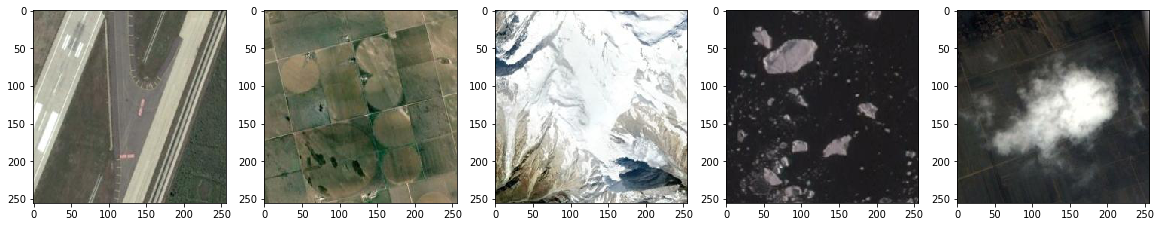

In [12]:
plt.figure(figsize=(20,10))
col = 5
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(entrIm[i])

In [13]:
entrIm = entrIm / 255.
testIm = testIm / 255.

# 2. Red Neuronal

In [14]:
import keras
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model

Using TensorFlow backend.


## 2.1 Se crea la Red Neuronal

In [15]:
modelo2 = Sequential()
modelo2.add(Conv2D(60, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(256,256,3)))
modelo2.add(MaxPooling2D((4, 4)))
modelo2.add(Conv2D(120, (3, 3), activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))
modelo2.add(Dropout(0.5))
modelo2.add(Conv2D(200, (3, 3), activation='relu'))
modelo2.add(MaxPooling2D((2, 2)))
modelo2.add(Conv2D(250, (3, 3), activation='relu'))
#modelo2.add(Dropout(0.5))

modelo2.add(Dropout(0.5))
modelo2.add(Flatten())
modelo2.add(Dense(512, activation='relu')) #relu sería lo normal
modelo2.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Entrenamiento de la red Neuronal diseñada**

In [19]:
modelo2.compile(optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
modelo2a = modelo2.fit(x=entrIm, y=entrCat, batch_size=32, epochs=22, verbose=1, validation_data=(testIm, testCat), shuffle=True)

Train on 1082 samples, validate on 322 samples
Epoch 1/22
1082/1082 [==============================] - 260s 240ms/step - loss: 0.1516 - acc: 0.9353 - val_loss: 0.2435 - val_acc: 0.9099
Epoch 2/22
1082/1082 [==============================] - 286s 264ms/step - loss: 0.0960 - acc: 0.9566 - val_loss: 0.2755 - val_acc: 0.9037
Epoch 3/22
1082/1082 [==============================] - 292s 270ms/step - loss: 0.1188 - acc: 0.9658 - val_loss: 0.2318 - val_acc: 0.9224
Epoch 4/22
1082/1082 [==============================] - 300s 278ms/step - loss: 0.0856 - acc: 0.9667 - val_loss: 0.2145 - val_acc: 0.9348
Epoch 5/22
1082/1082 [==============================] - 271s 251ms/step - loss: 0.1050 - acc: 0.9658 - val_loss: 0.2274 - val_acc: 0.9255
Epoch 6/22
1082/1082 [==============================] - 270s 249ms/step - loss: 0.0714 - acc: 0.9769 - val_loss: 0.2358 - val_acc: 0.9379
Epoch 7/22
1082/1082 [==============================] - 295s 272ms/step - loss: 0.0797 - acc: 0.9713 - val_loss: 0.1986 - val

In [20]:
modelo2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 60)      1680      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 120)       64920     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 120)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 120)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 200)       216200    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 200)       0         
__________

## 2.2 Evalución de la Red Neuronal

Se introduce el conjunto de Test a la Red Neuronal para medir su predicción

In [21]:
test_eval = modelo2.evaluate(valIm, valCat, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

modelo2.save("modF6.h5py")

860/860 [==============================] - 76s 89ms/step
Test loss: 0.17082016703694367
Test accuracy: 0.9465116284614385


Se guarda la red

In [22]:
modelo2.save("modFin.h5py")

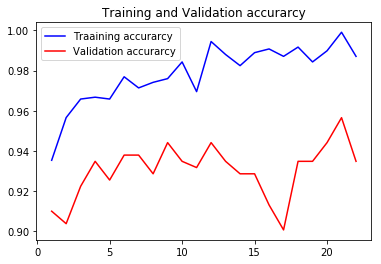

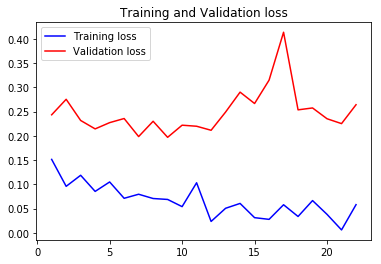

In [59]:
val_loss = modelo2a.history['val_loss']
val_acc = modelo2a.history['val_acc']
loss = modelo2a.history['loss']
acc = modelo2a.history['acc']

X1a1 = range(1, len(acc)+1)
plt.plot(X1a1, acc,'b', label='Traaining accurarcy')
plt.plot(X1a1, val_acc,'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(X1a1, loss, 'b', label='Training loss')
plt.plot(X1a1, val_loss, 'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


 **CURVAS ROC**

Se obtiene un Array con la prediccion de nuestro conjunto test

In [24]:
nub_pred = modelo2.predict(valIm, batch_size=32, verbose=1) 
nub_predicted = np.argmax(nub_pred, axis=1)  

860/860 [==============================] - 66s 77ms/step


In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

Se calculan los valores para la representación de la curva ROC

In [54]:
fpr, tpr, thresholds = roc_curve(valCat , nub_pred)
#print('raro',thresholds)

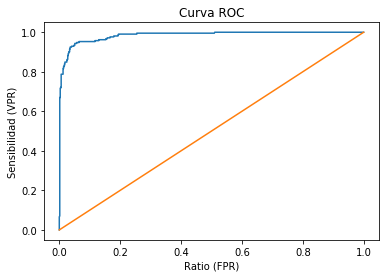

In [58]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'-')
plt.xlabel('Ratio (FPR)')
plt.ylabel('Sensibilidad (VPR)')
plt.title('Curva ROC')
plt.show()

Se obtiene el area de la curva

In [42]:
AUC=roc_auc_score ( valCat ,  nub_pred) #Area curva roc
print("Area de la curva ROC=",AUC)

Area de la curva ROC= 0.9841820987654321


In [43]:
#print(nub_pred)

**Obtención de otros valores estadisticos para la medición de la calidad del modelo**

In [46]:
dim = valCat.shape[0]
nv = 0; nf = 0; dv= 0; df = 0; na=0
cn = 0; cd= 0
inf=[]; idf=[]
for i in range(dim):
    if nub_pred[i] >= 0.5 and valCat[i] == 1:
        nv +=1
        cn +=1
    elif nub_pred[i] >= 0.5 and valCat[i] == 0:
        nf +=1
        inf.append(valIm[i])
        cd +=1
    elif nub_pred[i] < 0.5 and valCat[i] == 0:
        dv +=1
        cd +=1
    else :
        df +=1
        idf.append(valIm[i])
        cn +=1
    

In [49]:
print('Verdaderos Positivos VP=',nv)
print('Falsos Positivos FP=',nf)
print('Verdaderos Negativos VN=',dv)
print('Falsos Negativos FN=',df)
print('Sensibilidad VPR=',nv/cn)
print('Ratio FPR=',nf/cd)
print('Exatitud ACC=',(nv+dv)/(cn+cd))
print('Especifcidad SPC=',dv/cd)
print('Valor Predictivo Positivo PPV=',nv/(nv+nf))
print('Valor Predictivo Negativo NPV=',dv/(dv+df))
print('Ratio FDR=',nf/(nf+nv))

Verdaderos Positivos VP= 184
Falsos Positivos FP= 18
Verdaderos Negativos VN= 630
Falsos Negativos FN= 28
Sensibilidad VPR= 0.8679245283018868
Ratio FPR= 0.027777777777777776
Exatitud ACC= 0.9465116279069767
Especifcidad SPC= 0.9722222222222222
Valor Predictivo Positivo PPV= 0.9108910891089109
Valor Predictivo Negativo NPV= 0.9574468085106383
Ratio FDR= 0.0891089108910891


**Ejemplos de imagenes en las que el modelo fallo por encontrar nubes ,la primera es trampa de la base original :(**

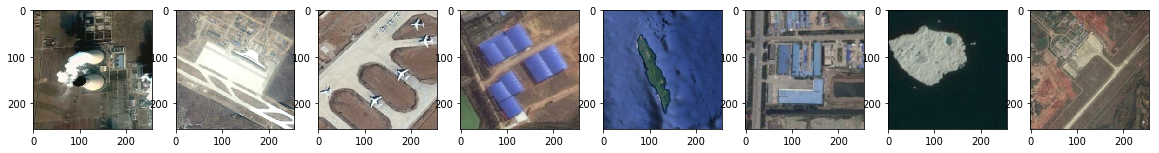

In [61]:
plt.figure(figsize=(20,10))
col = 8
for i in range(col):
    plt.subplot(5/col+1,col,i+1)
    plt.imshow(inf[i])